In [16]:
import os
import pickle
from matplotlib import pyplot as plt
import numpy as np

results_path = os.path.join('.', 'results')

['train_majority_loss', 'train_minority_loss', 'train_majority_accuracy', 'train_minority_accuracy', 'test_majority_loss', 'test_minority_loss', 'test_majority_accuracy', 'test_minority_accuracy', 'train_val_majority_loss', 'train_val_minority_loss', 'train_val_majority_accuracy', 'train_val_minority_accuracy', 'train_majority_weights_mean', 'train_minority_weights_mean', 'train_majority_nonzero_samples', 'train_minority_nonzero_samples']


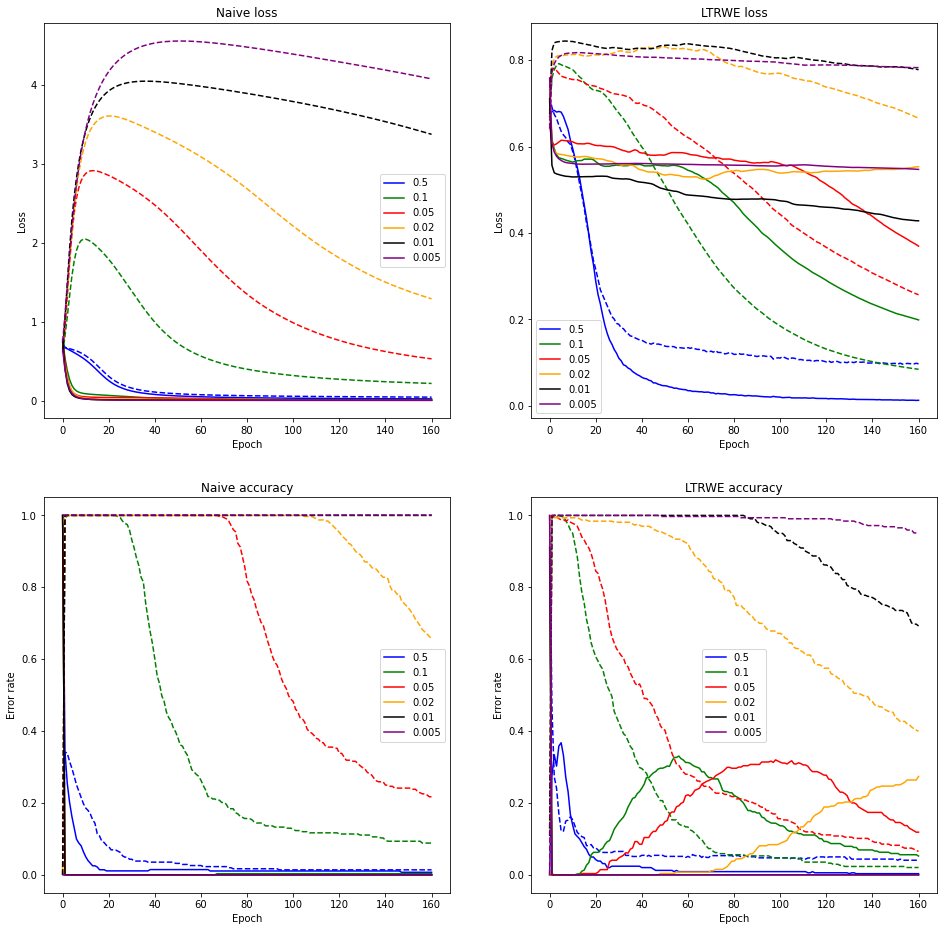

In [26]:
naive_results = []
ltrwe_results = []
for idx in range(6):
    with open(os.path.join(results_path, 'imbalanced_dataset_trial', 'results_MNIST_naive_{}.pickle'.format(idx)), 'rb') as F:
        naive_results.append(pickle.load(F))
    with open(os.path.join(results_path, 'imbalanced_dataset_trial', 'results_MNIST_ltrwe_{}.pickle'.format(idx)), 'rb') as F:
        ltrwe_results.append(pickle.load(F))
print([k for k in ltrwe_results[0].keys()])

def plot_performance_over_time(dicts, probs, colors, col):
    for (results_dict, p, c) in zip(dicts, probs, colors):
        x, y = results_dict['test_majority_loss']
        ax[0][col].plot(x, y, '-', color=c, label='{}'.format(p))
        x, y = results_dict['test_minority_loss']
        ax[0][col].plot(x, y, '--', color=c)
        x, y = results_dict['test_majority_accuracy']
        ax[1][col].plot(x, 1-y, '-', color=c, label='{}'.format(p))
        x, y = results_dict['test_minority_accuracy']
        ax[1][col].plot(x, 1-y, '--', color=c)
        ax[0][col].legend()
        ax[1][col].legend()

(fig, ax) = plt.subplots(2, 2, figsize=(16, 16))
ax[0][0].set_title('Naive loss')
ax[0][1].set_title('LTRWE loss')
ax[1][0].set_title('Naive accuracy')
ax[1][1].set_title('LTRWE accuracy')
ax[0][0].set_xlabel('Epoch')
ax[0][1].set_xlabel('Epoch')
ax[1][0].set_xlabel('Epoch')
ax[1][1].set_xlabel('Epoch')
ax[0][0].set_ylabel('Loss')
ax[0][1].set_ylabel('Loss')
ax[1][0].set_ylabel('Error rate')
ax[1][1].set_ylabel('Error rate')
probs = [.5, .1, .05, .02, .01, .005]
colors = ['blue', 'green', 'red', 'orange', 'black', 'purple']
plot_performance_over_time(naive_results, probs, colors, 0)
plot_performance_over_time(ltrwe_results, probs, colors, 1)

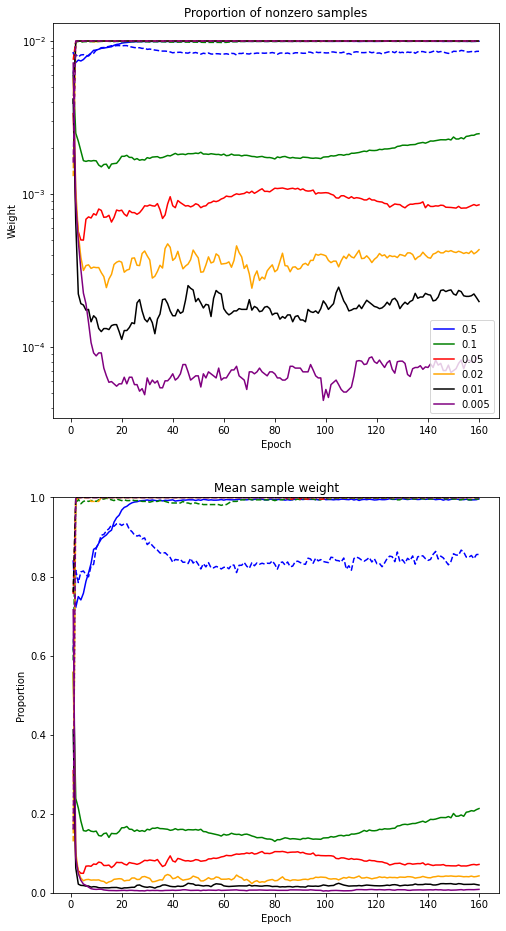

In [38]:
(fig, ax) = plt.subplots(2, 1, figsize=(8, 16))
ax[0].set_xlabel('Epoch')
ax[1].set_xlabel('Epoch')
ax[0].set_ylabel('Weight')
ax[1].set_ylabel('Proportion')
ax[0].set_title('Proportion of nonzero samples')
ax[1].set_title('Mean sample weight')

def plot_weight_over_time(dicts, probs, colors):
    for (results_dict, p, c) in zip(dicts, probs, colors):
        x, y = results_dict['train_majority_weights_mean']
        ax[0].plot(x, y, '-', color=c, label='{}'.format(p))
        x, y = results_dict['train_minority_weights_mean']
        ax[0].plot(x, y, '--', color=c)
        ax[0].legend()
        ax[0].set_yscale('log')

def plot_count_over_time(dicts, probs, colors):
    for (results_dict, p, c) in zip(dicts, probs, colors):
        x, y = results_dict['train_majority_nonzero_samples']
        y = y.astype(float)
        y /= 5000*(1-p)
        ax[1].plot(x, y, '-', color=c, label='{}'.format(p))
        x, y = results_dict['train_minority_nonzero_samples']
        y = y.astype(float)
        y /= 5000*p
        ax[1].plot(x, y, '--', color=c)
        ax[1].set_ylim(0, 1)

plot_weight_over_time(ltrwe_results, probs, colors)
plot_count_over_time(ltrwe_results, probs, colors)